In [11]:
# prediction des prix de l'immobilier en californie par district 

In [28]:
import pandas as pd

In [29]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request


def load_housing():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
    with tarfile.open(tarball_path) as housing_tarball:
        housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing()

In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### DATA EXPLORATION

In [4]:
# Pour comprendre les donnes 
    # 1.comprendre les correlations afin de reconnaitre les variables les plus explicatifs  
    # 2.Penser/trouver les variables qu'on pourrait creer: feature engineering 
 

In [5]:
# total_rooms et total_bedrooms ??
# population??
# households ??
# median_income? 

# Data Exploration
    # compter le nombre de lignes
    # ocean_proximity: verifie combien de cateogies differentes la colonne possede 
    # statistique descriptives
    # correlation entre les colonnes 
    # comprendre les types de données/colonnes + idees feature engineering 
    # rmk: normalisation a devoir appliquer sur au moins une colonne
# Y = alpha.x1 + alpha.x2 + alpa.x3 + C
# median_house_value = longitude + .... 
 


In [6]:
# compter le nombre de lignes et checker le type de colonnes, apercu des valeurs manquantes nan
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
# verifie combien de categories differentes la colonne possede
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [8]:
# statistique descriptives
housing.describe()

# rmk: total_bedrooms a des valeurs manquantes (TBC via l'etape pour checker les valeurs manquantes)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


#### plot: california map

<Axes: >

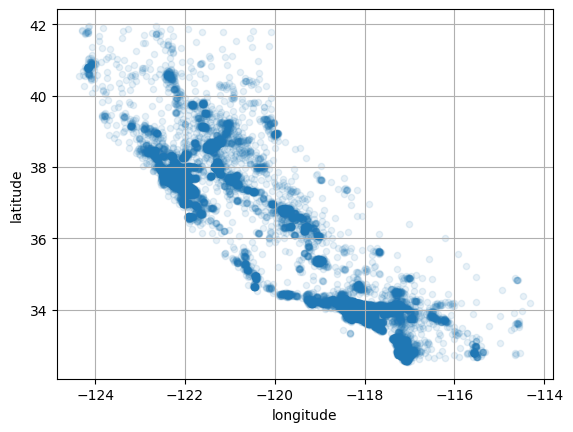

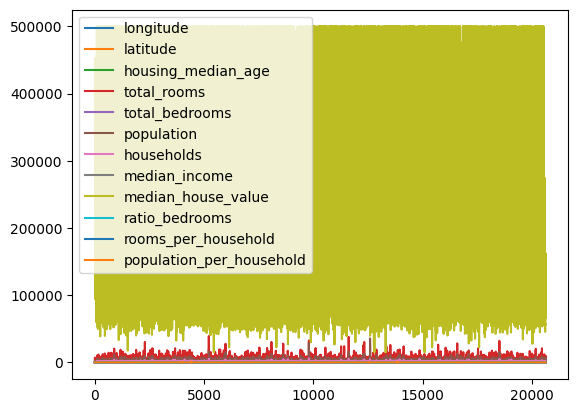

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, grid=True)

<module 'matplotlib.pyplot' from '/opt/homebrew/lib/python3.11/site-packages/matplotlib/pyplot.py'>

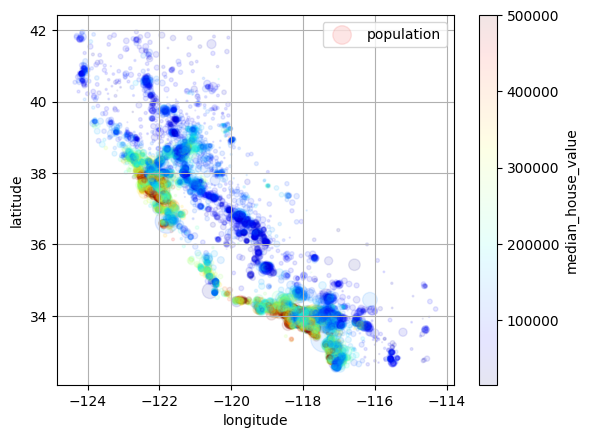

In [22]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, grid=True, s=housing["population"]/100, label="population", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt

#### Correlations 

In [10]:
corr_matrix_housing = housing.corr(numeric_only=True)

In [12]:
corr_matrix_housing["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

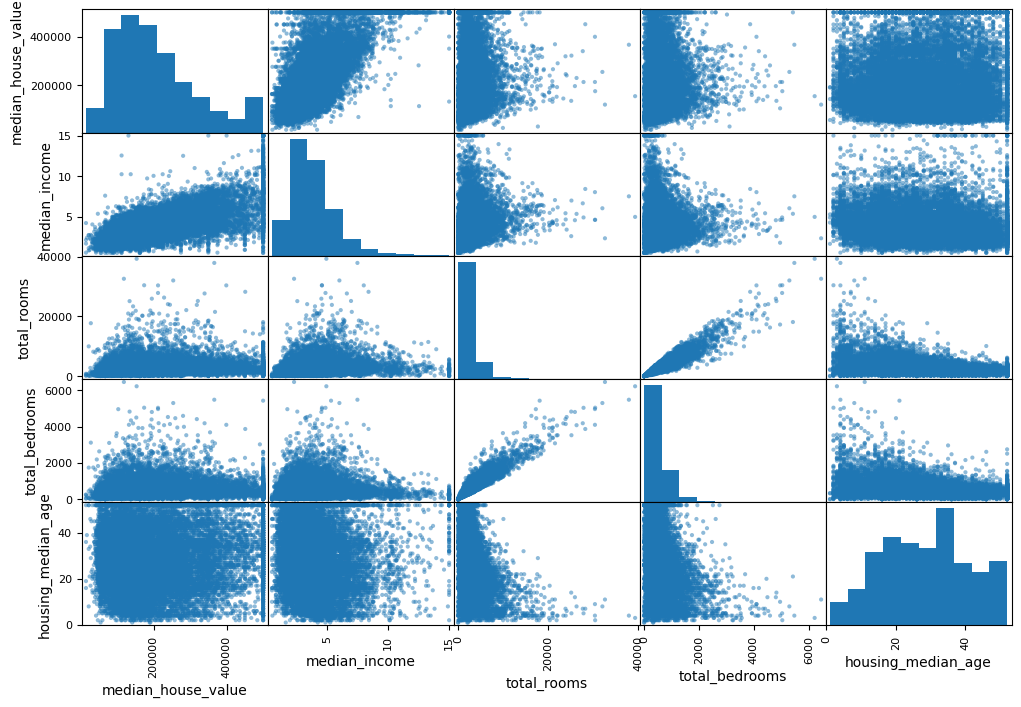

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
attributes = ["median_house_value", "median_income", "total_rooms", "total_bedrooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

#### feature engineering

In [31]:
# test
# housing["total_bedrooms"]
# housing["total_rooms"]

# pourcentage de chambre a coucher par chambre totale
housing["ratio_bedrooms"] = housing["total_bedrooms"] / housing["total_rooms"]

# rooms per household
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

# number of people per household
housing["population_per_household"] = housing["population"] / housing["households"]

housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio_bedrooms,rooms_per_household,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0.146591,6.984127,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0.155797,6.238137,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0.129516,8.288136,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0.184458,5.817352,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0.172096,6.281853,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0.224625,5.045455,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0.215208,6.114035,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0.215173,5.205543,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0.219892,5.329513,2.123209


In [20]:
# recalculer la matrice de correlation avec les 3 nouvelles variables
corr_matrix_housing_enhanced = housing.corr(numeric_only=True)

corr_matrix_housing_enhanced["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
ratio_bedrooms             -0.255880
Name: median_house_value, dtype: float64

#### nettoyage des donnees 

In [ ]:
# traiter les valeurs manquantes plusieurs options:
    # 1. supprimer la colonne entiere, methode radicale generalement on le fait si la colonne n'est pas importante (faible correlation) et/ou si elle contient beaucoup de valeurs manquantes (plus de 15% de valeurs manquantes)
    # 2. supprimer les lignes avec des valeurs manquantes, methode radicale utilise si ces observations ne sont pas nombreuses et ne supprimes pas des informations importantes specifiques a un certain cluster de donnees (representation des donnees)
    # 3. imputer les valeurs manquantes avec la moyenne/mediane/mode, methode la plus utilisee
# inplace=True modifie le dataframe existant sans avoir a redefinir la variable par exemple:  housing = housing.xxx


# option 1: supprimer la colonne entiere
    #housing.drop("total_bedrooms", axis=1, inplace=True)

# option 2: supprimer les lignes avec des valeurs manquantes
    # housing.dropna(subset=["total_bedrooms"], inplace=True) 

# option 3: inputer les valeurs manquantes avec la mediane
    # housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(), inplace=True)

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20433 non-null  float64
 1   latitude                  20433 non-null  float64
 2   housing_median_age        20433 non-null  float64
 3   total_rooms               20433 non-null  float64
 4   total_bedrooms            20433 non-null  float64
 5   population                20433 non-null  float64
 6   households                20433 non-null  float64
 7   median_income             20433 non-null  float64
 8   median_house_value        20433 non-null  float64
 9   ocean_proximity           20433 non-null  object 
 10  ratio_bedrooms            20433 non-null  float64
 11  rooms_per_household       20433 non-null  float64
 12  population_per_household  20433 non-null  float64
dtypes: float64(12), object(1)
memory usage: 2.2+ MB


In [32]:
# axis=1 correspond aux lignes et axis=0 aux colonnes
housing.loc[housing.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,ratio_bedrooms,rooms_per_household,population_per_household
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN,NaN,2.615836,3.164223
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND,NaN,5.553191,3.337152
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN,NaN,5.138418,3.211864
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND,NaN,4.949367,4.194093
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND,NaN,5.139241,2.373418


In [33]:
from sklearn.impute import SimpleImputer
import numpy as np 


imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number])

In [37]:
# Calcul la mediane de chaque colonne
imputer.fit(housing_num)
X = imputer.transform(housing_num)

In [40]:
housing_num_enhance = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing_num_enhance.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ratio_bedrooms            20640 non-null  float64
 10  rooms_per_household       20640 non-null  float64
 11  population_per_household  20640 non-null  float64
dtypes: float64(12)
memory usage: 1.9 MB


##### handling categorical columns

In [ ]:
# ocean_proximity
# <1H OCEAN     9136
# INLAND        6551
# NEAR OCEAN    2658
# NEAR BAY      2290
# ISLAND           5

In [44]:
housing_category_col = housing[["ocean_proximity"]]

In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

housing_cat_ohe = encoder.fit_transform(housing_category_col).toarray()
housing_cat_ohe

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [49]:
categories_encoder = OneHotEncoder(sparse_output=False)
housing_cat_ohe = categories_encoder.fit_transform(housing_category_col)
housing_cat_ohe

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [50]:
categories_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]